# Plotly: Common Plots (optional)

This notebook aims to give an introduction to common plots in Plotly. 

## Table of contents

<li> <a href='#P1'>Create and Save Plotly Figures</a></li>
<li> <a href='#P2'>Common Plots Statistical Plots</a></li>

In [1]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd

## Create and Save Plotly Figures

In this section, we will see how to create, modify and save a plotly figure. As an example, we aim at making a scatter plot using these 2 vectors

In [2]:
x = [0, 1, 2, 3, 4]
y = [10., 12.5, 4.5, 5.6, 20.]

### Plotly figures: graph_objects.Figure

The simplest way to create a figure with plotly is to use the function `Figure()` from submodule `graph_objects` (we already imported this module as `go`):



In [3]:
fig = go.Figure()

Once you created the figure `fig`, you can add data to plot using the `add_trace` method:

In [4]:
_ = fig.add_trace(go.Scatter(
    x=x,
    y=y,
    ))

Finally, you can use the method `show()` to display the figure:

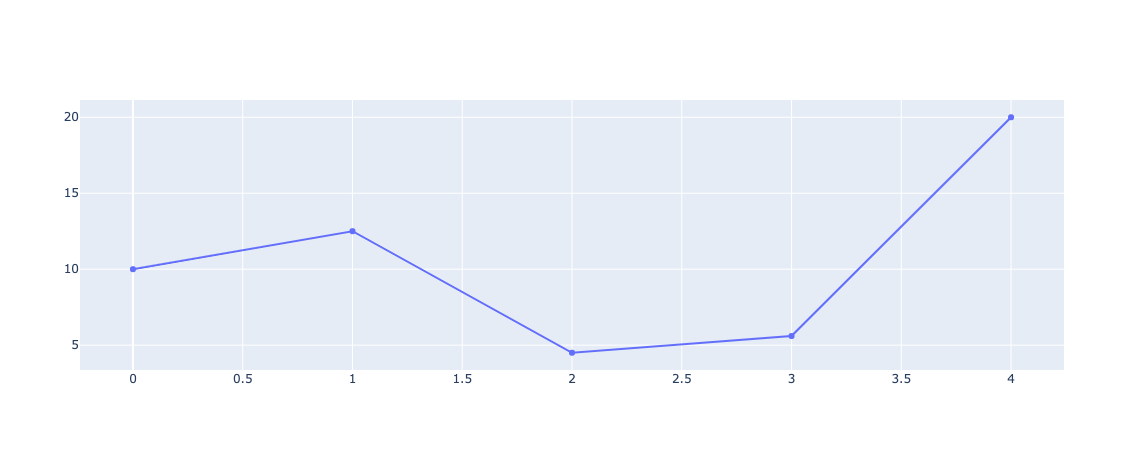

In [5]:
fig.show()

Alternativley, the plotly team has implemented a series of functions to allow you to create common plots much faster. Those are defined in the submodule `plotly.express` (we already imported it as `px`):

In [6]:
fig = px.scatter(x=x,y=y)

Likewise, you can display the figure in your notebook by typing:

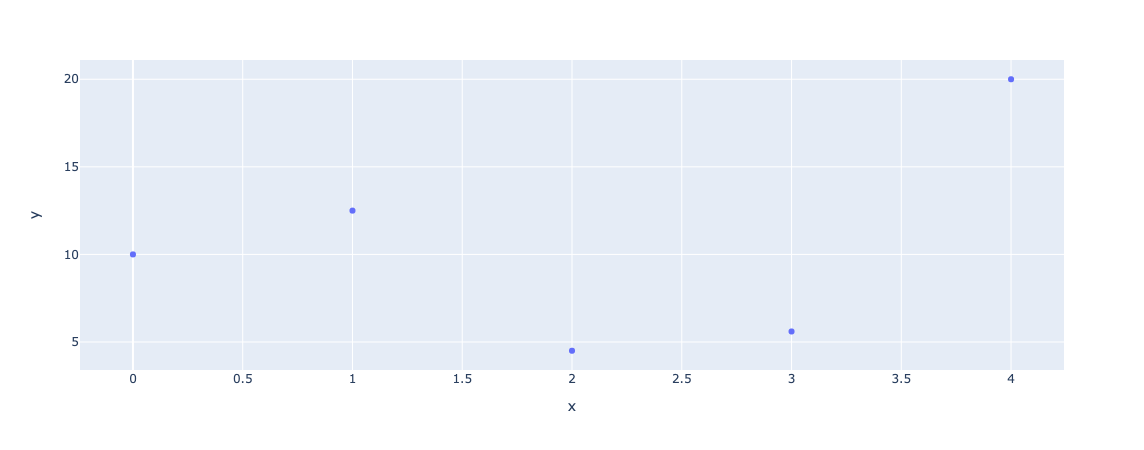

In [7]:
fig.show()

### Saving a Figure

You can save the figure in the most common formats using the figure method `write_image`. To do so, simply specify the full path for your image, including image name and extension. Plotly will deduce the format in which the image needs to be solved automatically:

***Note:*** We need to install kaleido to be able to export plotly figures in a static format: https://pypi.org/project/kaleido/

In [8]:
fig.write_image("images/fig1.png")

Other image extension:

In [9]:
fig.write_image("images/fig1.jpeg")
fig.write_image("images/fig1.svg")
fig.write_image("images/fig1.pdf")

Alternatively, you can save your image in html, wich preserves its interactive elements. To do this, use the method `write_html()` with the full path where you want your image to be saved:

In [10]:
fig.write_html("images/fig1.html")

### Common layout adjustments

#### main title and axis titles

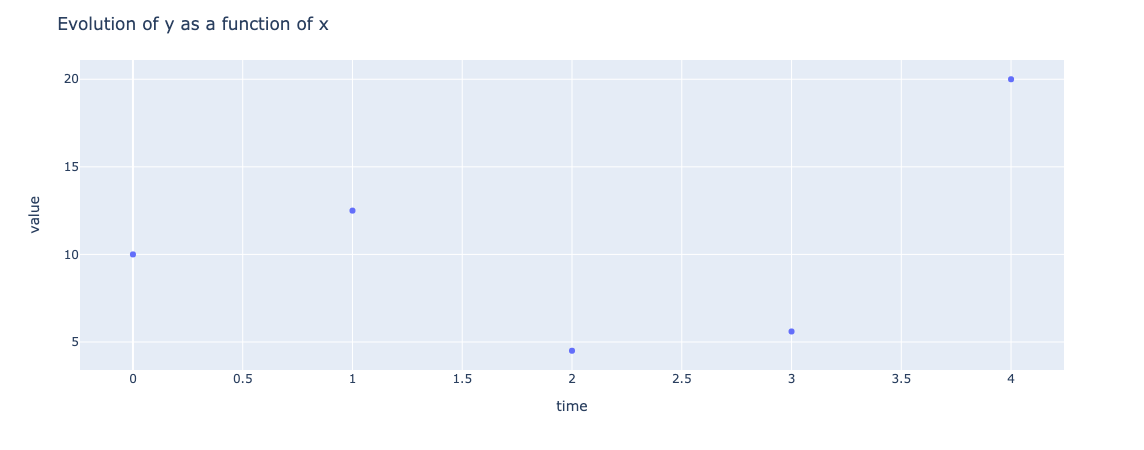

In [11]:
fig.update_layout(title="Evolution of y as a function of x", yaxis_title='value', xaxis_title="time")

#### figure size 

values are in pixels.


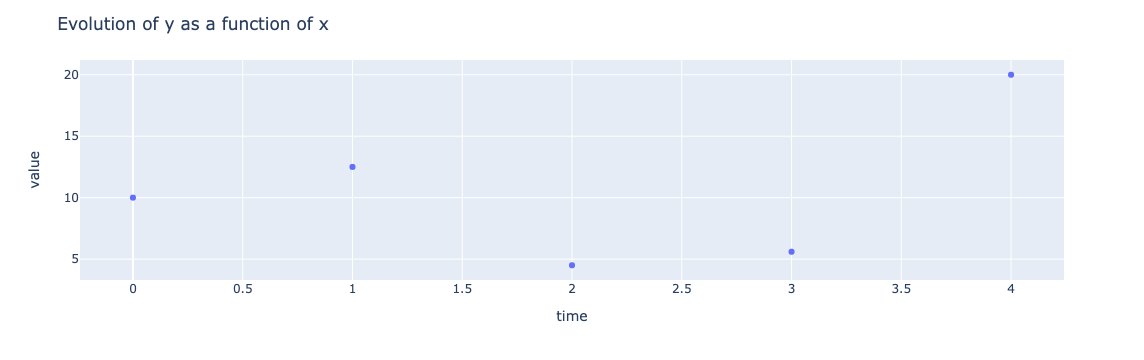

In [12]:
fig.update_layout(width=700, height=300)

#### templates

You can quickly adapt the style of the plots by using templates:

In [13]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [14]:
template = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]

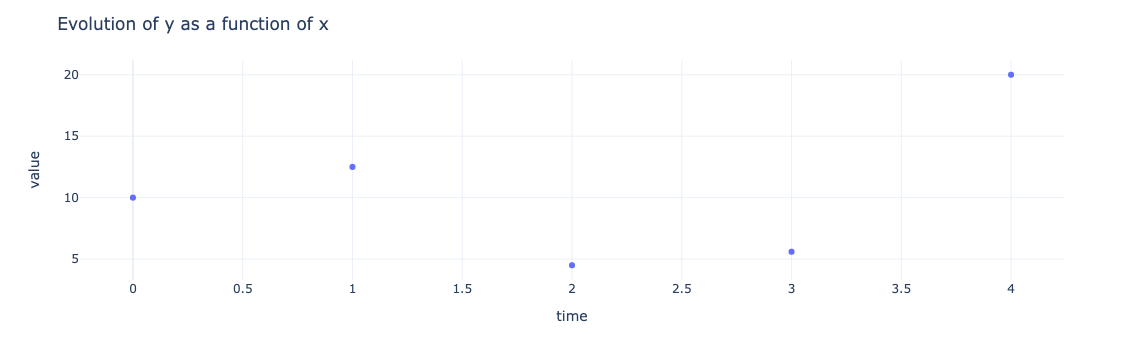

In [15]:
fig.update_layout(template=template[1])

further info on templates [here](https://plotly.com/python/templates/).

## Common plots

As we progress in the course, we will encounter various plots. Let's checkout some standard plots. For this, we will use plotly example tips data set:

In [16]:
df = px.data.tips()

In [17]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### Single Variable Distribution

use histogram to plot eithe continuous variables:

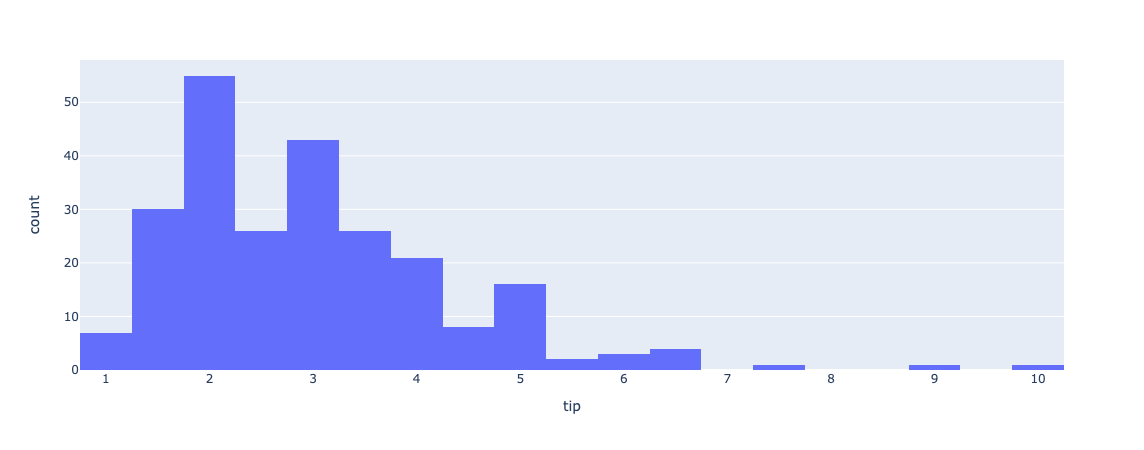

In [18]:
fig = px.histogram(df, x="tip", nbins=20)
fig.show()

or categories:

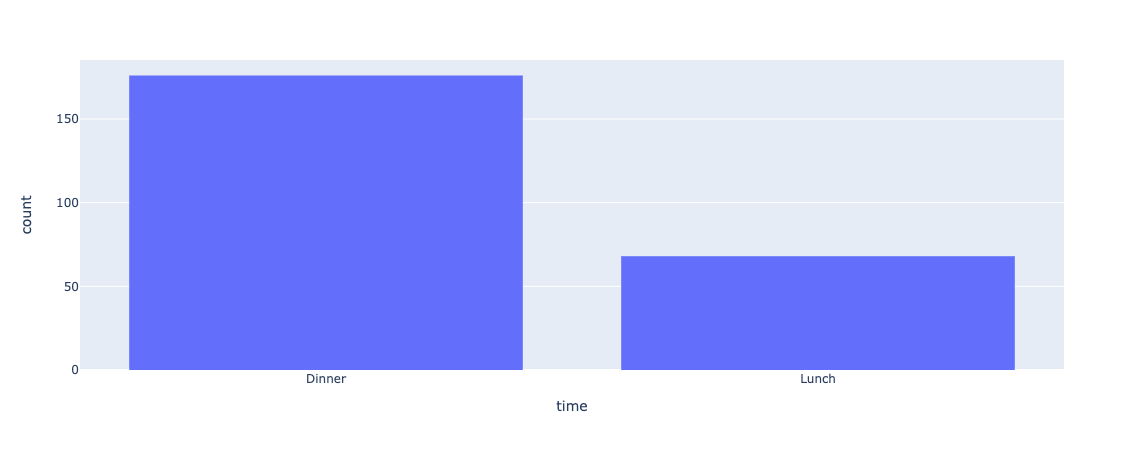

In [19]:
fig = px.histogram(df, x="time")
fig.show()

### Relations Between Variables

The function px.scatter_matrix will plot a grid of scatter plots showing the distribution of points for each pair of variables:

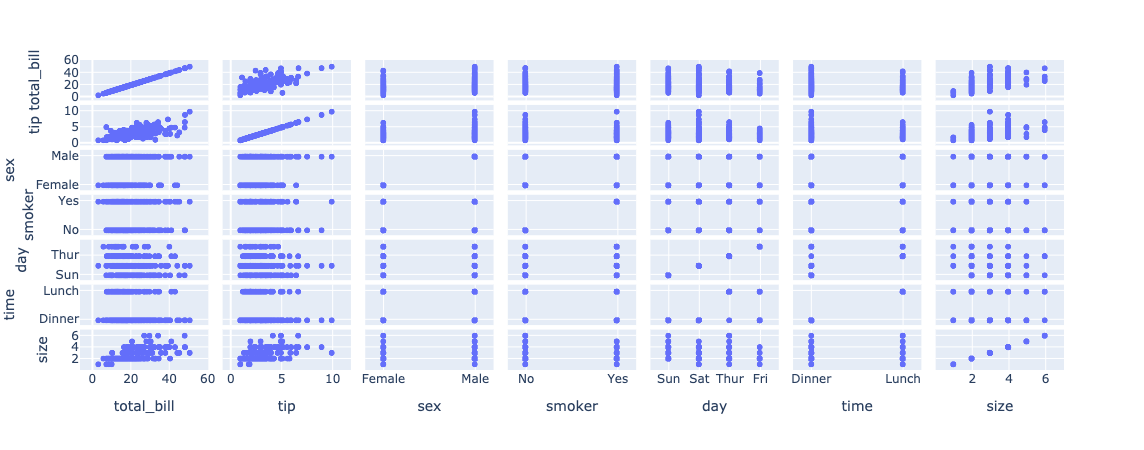

In [20]:
fig = px.scatter_matrix(df)
fig.show()

the function `px.density_heatmap()` will show 2 dimensional histograms of numerical values, along their marginal 1D histograms:

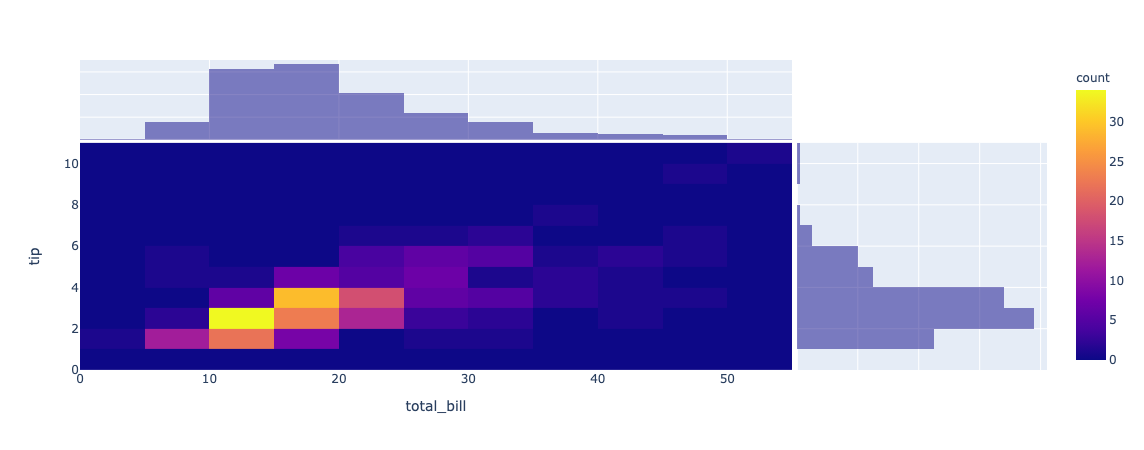

In [21]:
fig = px.density_heatmap(df, x="total_bill", y="tip", marginal_x="histogram", marginal_y="histogram")
fig.show()

You can also plot the data in 3D and use the interaction functionality to visualize the clouds of points:

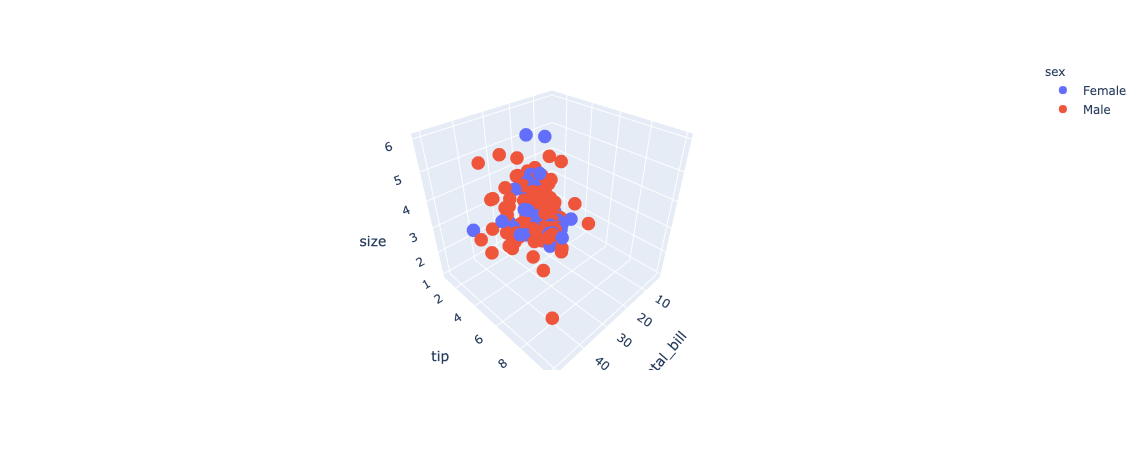

In [22]:
fig = px.scatter_3d(df, x='total_bill', y='tip', z='size',
              color='sex')
fig.show()

### Numeric Variables as a function of Categorical 

There are serveral plots you can make to look at how numerical data vary as a function of categorical variables. The simplest one is to make a scatter plot with categories in a different color:

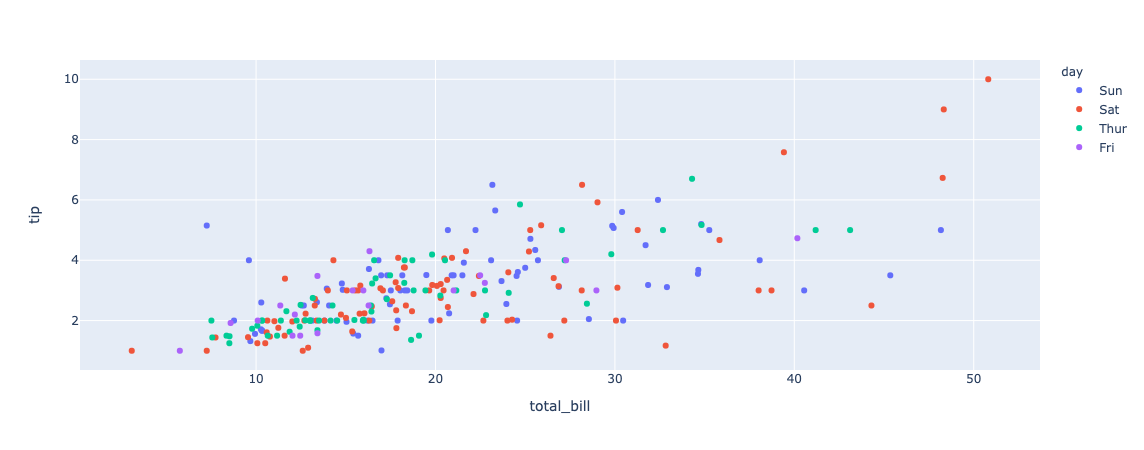

In [23]:
fig = px.scatter(df, x="total_bill", y="tip", color="day")
fig.show()

you can also plot each category in a separate plot:

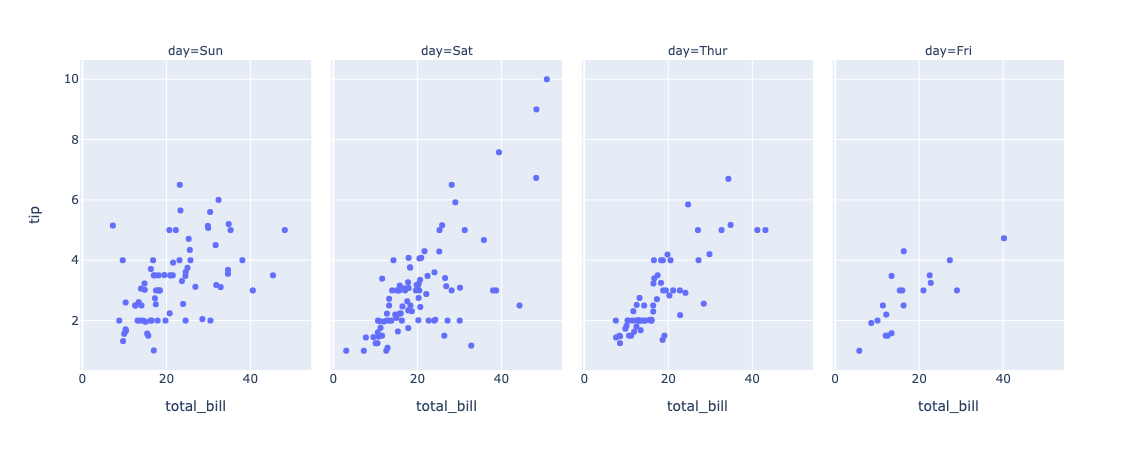

In [24]:
fig = px.scatter(df, x="total_bill", y="tip", facet_col="day")
fig.show()

You can plot summary statistics for each category using a boxplot (shows the median, first and third quartiles as well as min and max/lower/upper fence):

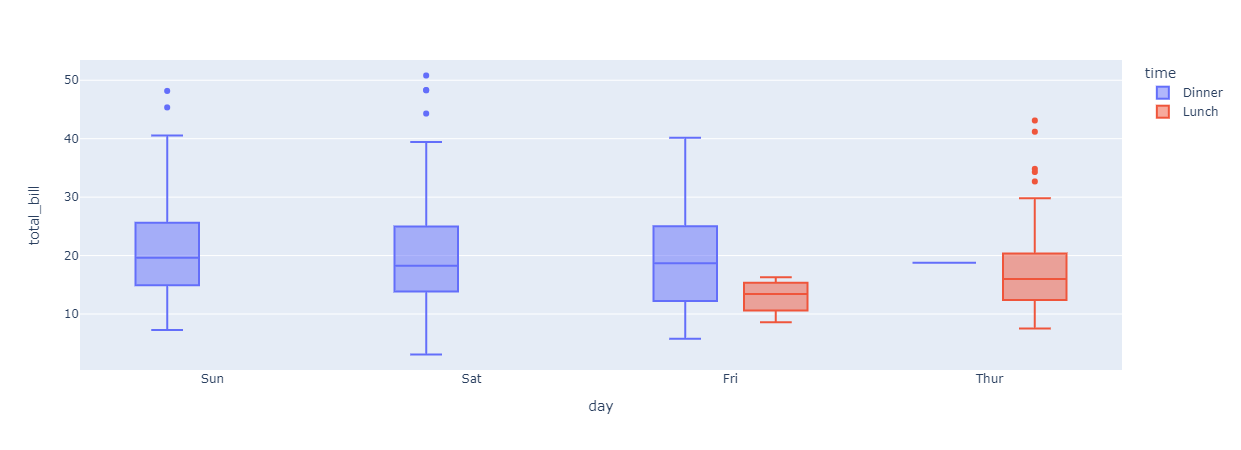

In [25]:
fig = px.box(df, y="total_bill", x="day", color='time')
fig.show()

or you can represent the estimated density using violinplots:

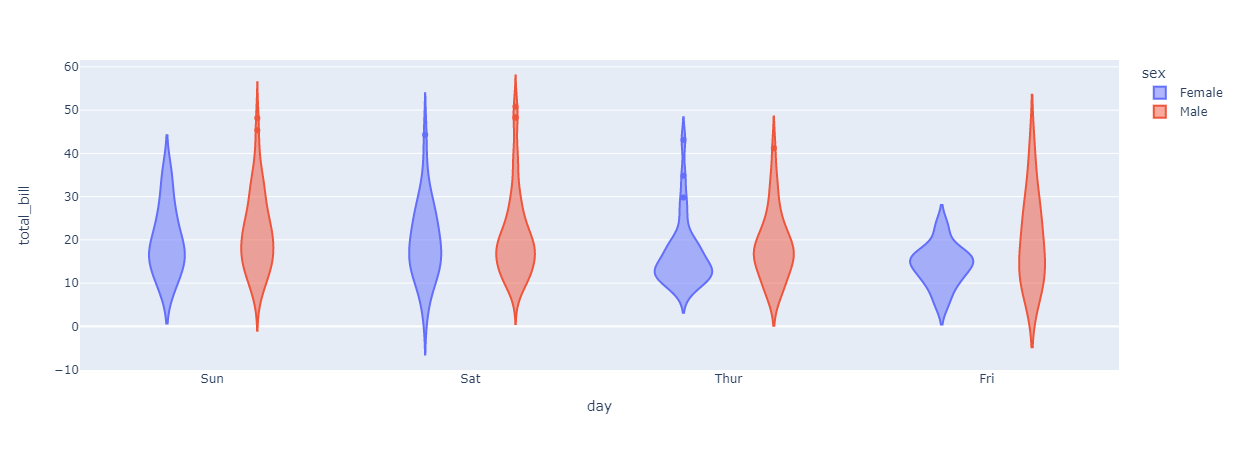

In [26]:
fig = px.violin(df, y="total_bill", x="day", color = 'sex')
fig.show()

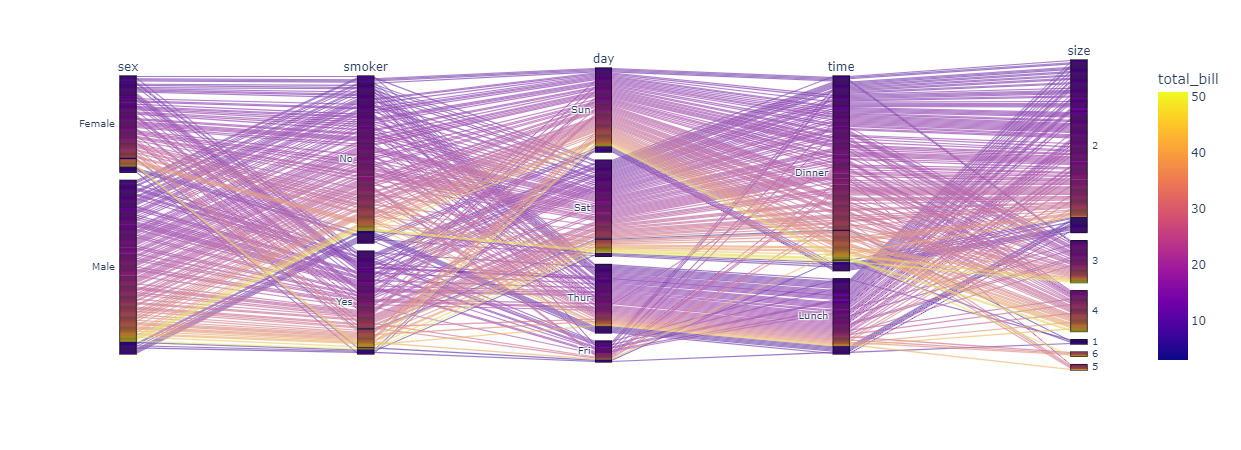

In [27]:
fig = px.parallel_categories(df, color='total_bill')
fig.show()

## Conclusion

Plotly implements many more visualizations in a minimalistic interface, for example, notice how many lines of code are needed to produce this GDP/Life Expectancy scatter plot animation:

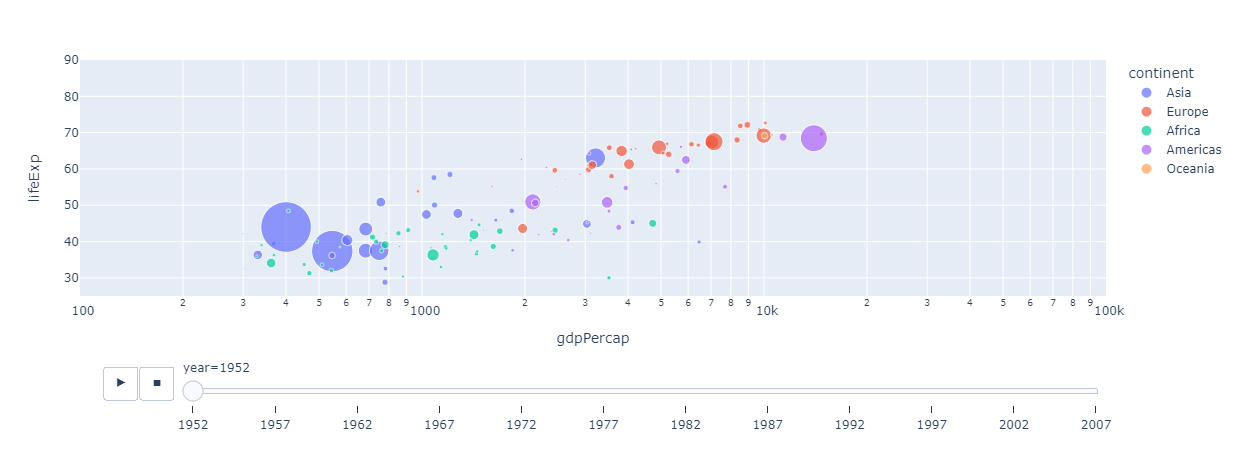

In [28]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show()

The best way to learn about Plotly is to check their [documentation page](https://plotly.com/python/), and especially their gallery of example!
